# Librerias

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Carga de datos

In [2]:
# Carga de datos
df = pd.read_csv(r'..\data\marketing_campaign_email_clean.csv')

# Análisis Exploratorio de Datos (EDA)

## Análisis Descriptivo y de Correlación
El objetivo es entender las estadísticas básicas y la relación entre las métricas

In [3]:
# Resumen de las métricas clave
print("\nEstadísticas Descriptivas de Métricas de Email Marketing:")
print(df[['Conversion_Rate', 'Acquisition_Cost', 'ROI', 'CTR']].describe().T)
df


Estadísticas Descriptivas de Métricas de Email Marketing:
                   count          mean          std          min          25%  \
Conversion_Rate   6760.0      7.953846     4.080990     1.000000     4.000000   
Acquisition_Cost  6760.0  12491.432396  4346.149358  5009.000000  8760.750000   
ROI               6760.0      5.002873     1.736687     2.000000     3.500000   
CTR               6760.0     13.995401    12.803914     1.030823     5.909976   

                           50%           75%           max  
Conversion_Rate       8.000000     12.000000     15.000000  
Acquisition_Cost  12435.000000  16307.500000  19999.000000  
ROI                   5.020000      6.520000      8.000000  
CTR                   9.953582     17.176636     94.941634  


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,CTR,Day_of_Week
0,58,Innovate Industries,Email,Men 18-24,60 days,Email,6.0,17305.0,2.70,New York,French,569,1850,2,Fashionistas,2021-02-27,30.756757,Saturday
1,59,Alpha Innovations,Email,Women 25-34,45 days,Email,4.0,18063.0,4.93,Chicago,English,330,6920,6,Foodies,2021-02-28,4.768786,Sunday
2,61,DataTech Solutions,Email,Men 25-34,45 days,Email,5.0,8785.0,2.27,New York,German,849,9217,5,Fashionistas,2021-03-02,9.211240,Tuesday
3,62,TechCorp,Email,Men 25-34,30 days,Email,9.0,13848.0,5.32,Los Angeles,French,261,1958,2,Tech Enthusiasts,2021-03-03,13.329928,Wednesday
4,92,TechCorp,Email,Men 25-34,45 days,Email,9.0,17705.0,7.00,New York,Spanish,628,9545,4,Outdoor Adventurers,2021-04-02,6.579361,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6755,199838,Innovate Industries,Email,Men 25-34,45 days,Email,4.0,17988.0,7.53,Houston,French,955,8822,1,Outdoor Adventurers,2021-07-02,10.825210,Friday
6756,199897,DataTech Solutions,Email,Men 18-24,60 days,Email,1.0,14039.0,6.71,Miami,Mandarin,500,6670,7,Foodies,2021-08-30,7.496252,Monday
6757,199944,NexGen Systems,Email,Women 35-44,30 days,Email,12.0,11687.0,7.59,Chicago,English,653,7959,6,Foodies,2021-10-16,8.204548,Saturday
6758,199979,Alpha Innovations,Email,Women 35-44,15 days,Email,14.0,18003.0,2.25,Houston,English,716,2687,1,Health & Wellness,2021-11-20,26.646818,Saturday


In [4]:
# Seleccionar las métricas clave y normalizarlas
metrics_to_normalize = ['Conversion_Rate', 'CTR']
scaler = MinMaxScaler()
df_email_normalized = df.copy()
df_email_normalized[metrics_to_normalize] = scaler.fit_transform(df_email_normalized[metrics_to_normalize])

## Matriz de correlación
Relación entre variables numéricas

In [5]:
# Seleccionar las columnas numéricas de interés
numeric_cols = ['Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions', 'CTR', 'Engagement_Score']

# Calcular la matriz de correlación
correlation_matrix = df[numeric_cols].corr()

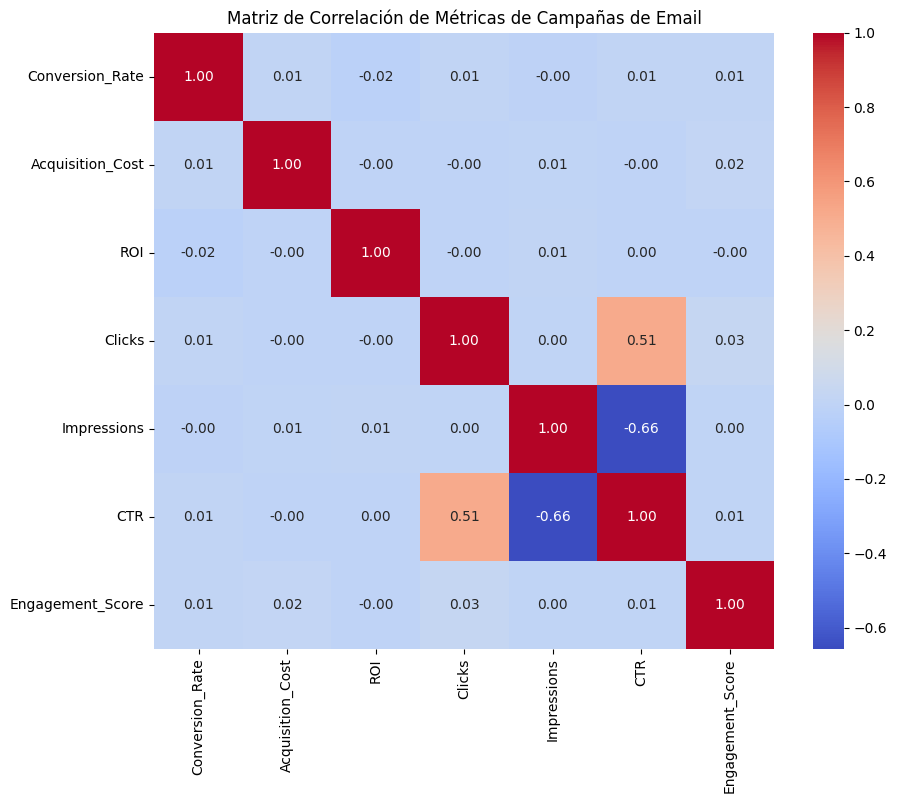

In [6]:
# Visualización de la matriz de correlación usando heatmap
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Métricas de Campañas de Email')
plt.show()

## Rendimiento por Segmento de Cliente
El objetivo es identificar los segmentos de clientes más rentables y receptivos

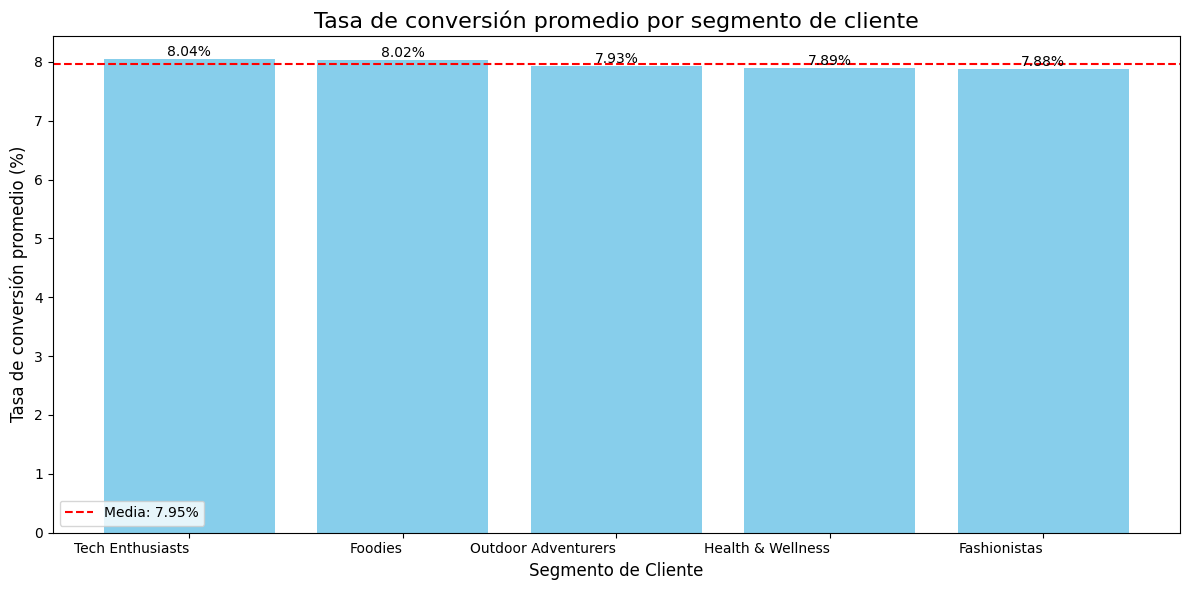

In [7]:
# Analizar el rendimiento promedio por segmento de cliente
customer_performance = df.groupby('Customer_Segment')[['Conversion_Rate', 'CTR']].mean().sort_values(by='Conversion_Rate', ascending=False)

# Gráfico de barras y obtener los ejes
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(customer_performance.index, customer_performance['Conversion_Rate'], color='skyblue')

# Añadir los valores numéricos encima de cada barra
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height,
            f'{height:.2f}%',
            ha='center', va='bottom', fontsize=10)

# Línea horizontal para la media general
avg_conversion_rate = df['Conversion_Rate'].mean()
ax.axhline(y=avg_conversion_rate, color='red', linestyle='--', label=f'Media: {avg_conversion_rate:.2f}%')

# Configurar el gráfico
plt.title('Tasa de conversión promedio por segmento de cliente', fontsize=16)
plt.ylabel('Tasa de conversión promedio (%)', fontsize=12)
plt.xlabel('Segmento de Cliente', fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### **Creación y análisis de Segmentos lógicos**

In [8]:
# Definir los umbrales para la segmentación de la audiencia
# Estos umbrales son un ejemplo, se pueden ajustar según los datos que se proporcionen
# Por ejemplo, la media del CTR es buen punto de partida para definir 'alto' y 'bajo'
avg_ctr = df['CTR'].mean()
avg_conversion_rate = df['Conversion_Rate'].mean()

# Crear una función para clasificar a los usuarios en segmentos
def classify_audience(row):
    # Condición para "Audiencia Engaged"
    if row['CTR'] > avg_ctr and row['Conversion_Rate'] > avg_conversion_rate:
        return 'Audiencia Engaged'
    # Condición para "Audiencia Receptiva pero no Converte"
    elif row['CTR'] > avg_ctr and row['Conversion_Rate'] <= avg_conversion_rate:
        return 'Audiencia Receptiva pero no Converte'
    # Condición para "Audiencia Inactiva"
    else:
        return 'Audiencia Inactiva'

# Aplicar la función al DataFrame para crear la nueva columna 'Audience_Segment'
df['New_Audience_Segment'] = df.apply(classify_audience, axis=1)

# Analizar el tamaño de los nuevos segmentos
print("Conteo de registros por cada nuevo segmento de audiencia:")
print(df['New_Audience_Segment'].value_counts())

# Opcional: Analizar el rendimiento de los nuevos segmentos
# Puedes graficar la tasa de conversión, el CTR, etc. para ver si tus segmentos lógicos funcionan
new_segment_performance = df.groupby('New_Audience_Segment')[['Conversion_Rate', 'CTR']].mean()
print("\nDesempeño promedio de los nuevos segmentos de audiencia:")
print(new_segment_performance)

Conteo de registros por cada nuevo segmento de audiencia:
New_Audience_Segment
Audiencia Inactiva                      4567
Audiencia Engaged                       1185
Audiencia Receptiva pero no Converte    1008
Name: count, dtype: int64

Desempeño promedio de los nuevos segmentos de audiencia:
                                      Conversion_Rate        CTR
New_Audience_Segment                                            
Audiencia Engaged                           11.249789  27.795808
Audiencia Inactiva                           7.923144   7.386320
Audiencia Receptiva pero no Converte         4.218254  27.715831


La segmentación de audiencia es una estrategia que se basa en el comportamiento de los usuarios para agruparlos en categorias específicas. El objetivo es conocer a la audiencia para poder enviarles los correos más relavantes y lograr un mayor impacto. 
Se utilizó la medida de CTR y Tasa de conversión para establecer una base lógica. 
Un usuario con métricas por encima del promedio es considerado "alto", en caso contrario, cuando es bajo se lo considera "bajo". 

- Audiencia Engaged: Alto CTR y alta Tasa de Conversión. Usuarios muy activos: abren e interactuan con el contenido (haciendo clics en enlaces, imágenes, videos o visitando la página de destino). 
- Audiencia Receptiva pero no Converte: Alto CTR pero baja Tasa de Conversión. Usuarios con gran potencial: abren los correos con regularidad e interactuan pero muy pocas veces completan la acción deseada (conversión).
- Audiencia Inactiva: Bajo CTR y baja Tasa de Apertura. Usuarios que no prestan atención a los correos o no los abren. 

## Rendimiento por Día de la Semana
El objetivo es determinar el mejor día para enviar las campañas por email. 

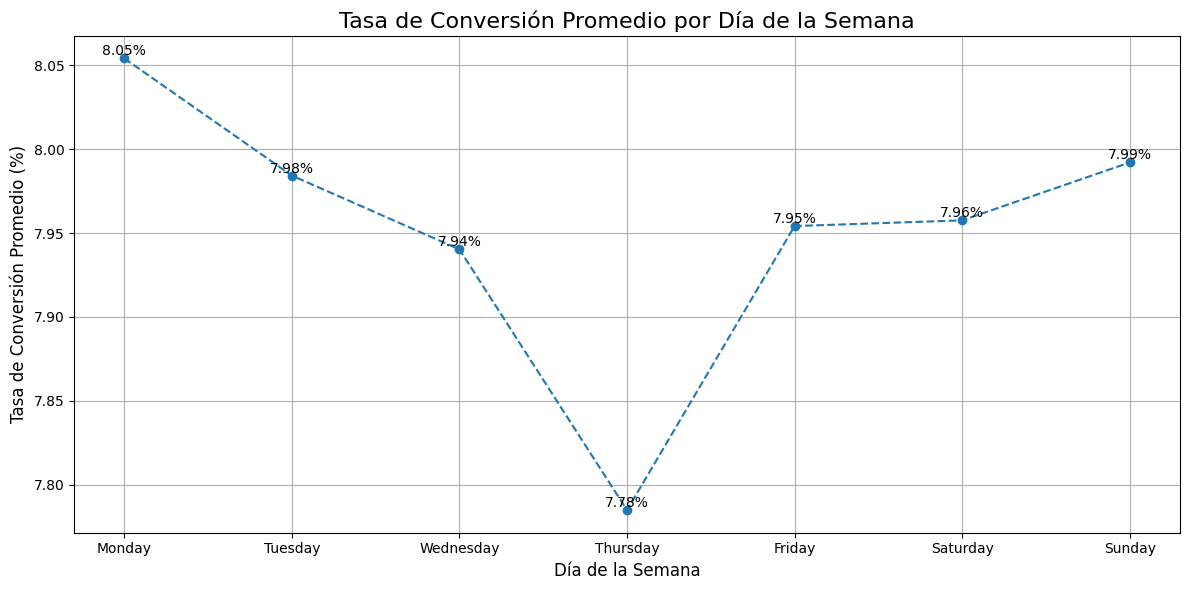

In [9]:
# Tasa de Conversión por día

# Orden de los días de la semana
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Agrupar por día de la semana y calcular la media de las métricas
daily_performance = df.groupby('Day_of_Week')[['Conversion_Rate', 'CTR']].mean().reindex(day_order)

# Visualización para la Tasa de Conversión
fig, ax = plt.subplots(figsize=(12, 6))
daily_performance['Conversion_Rate'].plot(kind='line', marker='o', linestyle='--', ax=ax)

# Añadir los valores numéricos encima de cada punto
for i, txt in enumerate(daily_performance['Conversion_Rate']):
    ax.text(i, txt, f'{txt:.2f}%', ha='center', va='bottom', fontsize=10)

plt.title('Tasa de Conversión Promedio por Día de la Semana', fontsize=16)
plt.ylabel('Tasa de Conversión Promedio (%)', fontsize=12)
plt.xlabel('Día de la Semana', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\shiar\AppData\Local\Temp\ipykernel_12932\2464955634.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_ctr.index, y=daily_ctr.values, palette='Greens_r')


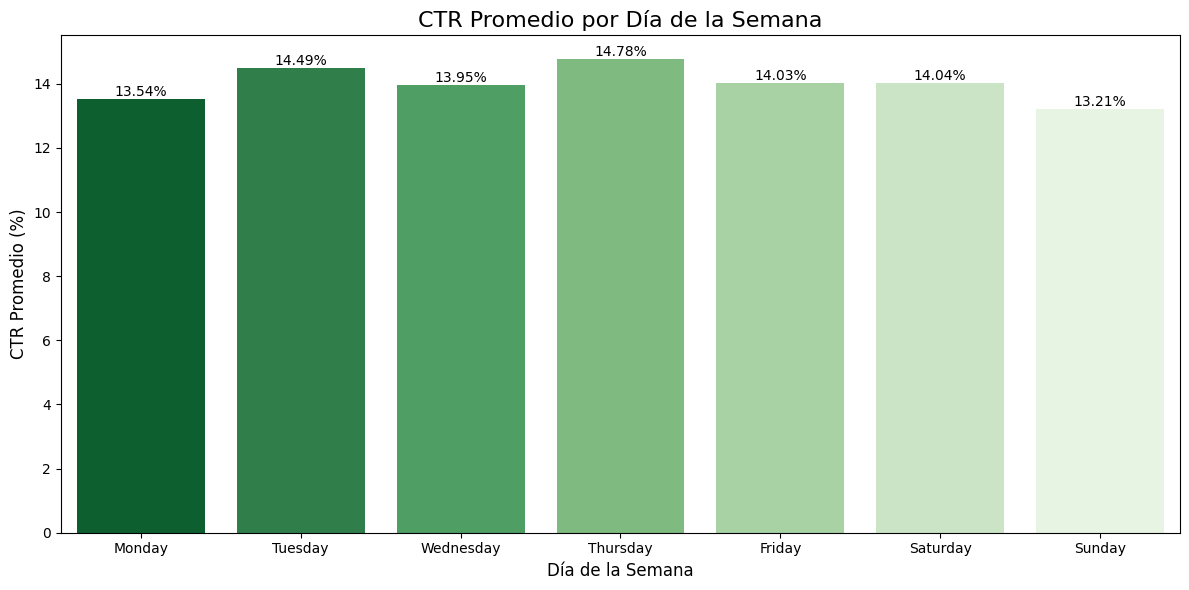

In [10]:
# Definir el orden correcto de los días de la semana
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Agrupar por día de la semana y calcular la media de CTR
daily_ctr = df.groupby('Day_of_Week')['CTR'].mean().reindex(day_order)

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=daily_ctr.index, y=daily_ctr.values, palette='Greens_r')

# Añadir los valores numéricos encima de cada barra
for index, value in enumerate(daily_ctr.values):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

plt.title('CTR Promedio por Día de la Semana', fontsize=16)
plt.ylabel('CTR Promedio (%)', fontsize=12)
plt.xlabel('Día de la Semana', fontsize=12)
plt.tight_layout()
plt.show()

# **Conclusiones**

**Análisis de correlación**
Se observa una fuerte correlación positiva entre el CTR y la Tasa de Conversión. Esto indica que a medida que aumenta la interacción del usuario con las campañas de email (hacen más clics), la probabilidad de que se conviertan en una acción deseada (conversión), aumenta significativamente.

**Análisis de Segmentación y Rendimiento**
El análisis revela 2 hallazgos princiaples sobre la audiencia de la empresa: 
1. **Uniformidad en Segmentos predefinidos**: las tasas de conversión son notablemente uniformes en todos los segmentos de clientes, ya que la diferencia entre ellos es insignificante. Por ejemplo, aunque el segmento "Tech Enthusiasts" tiene la tasa más alta (8.04%), la diferencia con el segmento de menor rendimiento ("Foodies", con 8.02%) es insignificante. Esto sugiere que la estrategia de marketing actual no está adaptada a cada grupo, lo que resulta en un rendimiento similar para todos.
2. **Variedad de Comportamientos**: al crear nuevos segmentos basados en el comportamiento, se identificó 3 grupos sociales: 
    - **Audiencia Engaged**: El segmento más valioso, demostrando consistentemente un alto rendimiento tanto en CTR (27.80%) como en Tasa de Conversión (11.25%). Son usuarios activos y receptivos a las campañas, y sus métricas están significativamente por encima del promedio, lo que los convierte en un público ideal para campañas de ventas directas y promociones exclusivas.

    - **Audiencia Receptiva pero no Converte**: Este grupo, con un CTR alto (27.72%) y una Tasa de Conversión notablemente baja (4.22%), representa una gran oportunidad sin explotar. Su comportamiento sugiere que están interesados en el contenido de los correos, pero algo en el proceso de compra o en la oferta misma les impide completar la acción.

    - **Audiencia Inactiva**: El segmento de menor rendimiento, con un CTR (7.39%) y una Tasa de Conversión (7.92%) por debajo del promedio. Estos usuarios no están interactuando con las campañas, lo que puede deberse a falta de interés o saturación de correos.

**Análisis de Temporalidad**
Al analizar los gráficos de rendimiento por día de la semana, se observa una aparente discrepancia: la Tasa de Conversión es más alta los lunes, mientras que el CTR es más alto los jueves. Esta aparente contradicción es, en realidad, un hallazgo crucial que demuestra un comportamiento de usuario. 
- Los Lunes son para la acción/toma de decisiones: el pico de rendimiento en la Tasa de Conversión (8.05%) ocurre los lunes. Sugiere que los usuarios están más predispuestos a completar acciones al inicio de la semana. 
- Los Jueves son para la exploración: el pico más alto de CTR (14.78%) ocurre los jueves. Es el día más efectivo para captar la atención de los usuarios y generar clics. La audiencia está más dispuesta a hacer clics y explorar contenido. 

No hay un solo "mejor día" para las campañas de email, la efectividad depende del objetivo. Si el objetivo principal es generar ventas o registros (conversiones), el lunes es el día ideal. Si la meta es aumentar el conocimiento de marca o el tráfico a una página web (engagement), el jueves es el día más efectivo

# Recomendaciones
Basado en el análisis exploratorio de las campañas de email marketing, se sugieren las siguientes recomendaciones para optimizar las campañas de email de la empresa "Aura Glow"
1. **Implementar una estrategia de envío multiobjetivo**: Reconociendo que el lunes es el día más efectivo para conversiones y el jueves para el engagement (CTR), se recomienda diversificar la estrategia de envío. Las campañas con un enfoque directo en ventas, promociones o registros (objetivos de conversión) deberían ser priorizadas para los lunes. Por lo contrario, las campañas orientadas a la construcción de marca, contenido de valor, o tráfico al blog (objetivos de engagement) deberían ser programadas para los jueves.
2. **Optimizar el Engagement general**: La fuerte correlación positiva entre el CTR y la Tasa de Conversión indica que aumentar los clics es la palanca principal para impulsar las ventas. La empresa debe enfocar esfuerzos en mejorar elementos que promuevan la interacción, tales como líneas de asunto más atractivas, diseños visualmente impactantes y llamadas a la acción (CTA) más claras y persuasivas.
3. **Personalizar el contenido por segmento**: A pesar de que los rendimientos actuales son uniformes, existe una oportunidad sin explotar. La empresa debe pasar de una estrategia de genérica a una de contenido personalizado, se recomienda realizar pruebas A/B para desarrollar y probar campañas de email específicas para los intereses de cada segmento (por ejemplo, ofertas de productos para 'Health & Wellness' o contenido de blog para 'Tech Enthusiasts').  
4. **Desarrollar estrategias específicas para cada segmento por comportamiento**: Implementar las campañas especializadas para los nuevos segmentos de audiencia: 
    - **Recompensar a la audiencia Engaged**: Crear campañas específicas para este grupo, ofreciendo ventas exclusivas, acceso anticipado a productos, programas de lealtad o promociones especiales. Esto reforzará su comportamiento positivo y maximizará las conversiones directas.
    - **Nutrir a la audiencia receptiva**: Diseña campañas de nutrición enfocadas en este segmento. En lugar de promociones agresivas, envía contenido educativo, reseñas de productos o testimonios de clientes, para abordar las posibles barreras que impiden la conversión. Una prueba A/B podría ayudar a identificar los incentivos que los motiven a completar la compra.
    - **Reactiva o limpia la Audiencia Inactiva**: Lanza una campaña de re-engagement con un enfoque diferente, como una oferta especial de bienvenida o una encuesta para entender sus intereses. Si después de varios intentos no muestran interacción, considera eliminarlos de la base de datos para mejorar la tasa de entregabilidad y la calidad general de la audiencia.